In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
riqueza = pd.read_csv('https://raw.githubusercontent.com/leoferres/gitiele356b/main/data/hdi.csv')
#Indice de Desarrollo Humano por Región

In [4]:
riqueza.head()

,comuna,LEI,II,EI,idh,HDI
0,13101,0.791672,0.873137,0.924099,0.807,0.861222
1,13102,0.782817,0.800343,0.713499,0.743,0.764616
2,13103,0.752447,0.750382,0.657961,0.683,0.718874
3,13104,0.784872,0.760697,0.705426,0.707,0.749584
4,13105,0.777236,0.780019,0.673876,0.711,0.742015


In [5]:
riqueza = riqueza.drop(['LEI', 'II', 'EI', 'idh'], axis = 1)

In [6]:
riqueza = riqueza.dropna()

In [7]:
vacunados = pd.read_csv ('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto80/vacunacion_comuna_2daDosis.csv')
#Datos sacados de github MinCiencia
#Se considerarón los de la segunda dosis, para tener los del proceso completo

In [8]:
vacunados.head()

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,...,2021-05-26,2021-05-27,2021-05-28,2021-05-29,2021-05-30,2021-05-31,2021-06-01,2021-06-02,2021-06-03,2021-06-04
0,Arica y Parinacota,15,Arica,15101.0,247552.0,0.0,0.0,0.0,0.0,0.0,...,629.0,713.0,558.0,41.0,3.0,733.0,1185.0,504.0,0.0,0.0
1,Arica y Parinacota,15,Camarones,15102.0,1233.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,1.0,0.0,0.0,5.0,3.0,3.0,5.0,3.0
2,Arica y Parinacota,15,General Lagos,15202.0,810.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,3.0
3,Arica y Parinacota,15,Putre,15201.0,2515.0,0.0,0.0,0.0,0.0,0.0,...,11.0,2.0,0.0,0.0,0.0,5.0,14.0,0.0,0.0,0.0
4,Arica y Parinacota,15,Desconocido Arica y Parinacota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
vacunados = vacunados.drop(['Codigo region'], axis = 1)

In [10]:
vacunados = vacunados[vacunados['Region'] == 'Metropolitana']

In [11]:
vacunados['Vacunados'] = vacunados.iloc[:, -163:-1].sum(axis = 1)
#Sacamos las columnas de fechas, porque nos interesa el total 

In [12]:
vacuna = vacunados[['Codigo comuna', 'Vacunados']].copy()

In [13]:
vacuna = vacuna.dropna()

In [14]:
vacuna = vacuna.sort_values(['Codigo comuna', 'Vacunados'], ascending = True)

In [15]:
vacuna.head()

,Codigo comuna,Vacunados
136,13101.0,198722.0
91,13102.0,32757.0
92,13103.0,43463.0
94,13104.0,60789.0
96,13105.0,58653.0


In [16]:
vacuna.insert(2, 'HDI', 0, allow_duplicates = True)

In [17]:
nivel = riqueza['HDI']

In [18]:
L = []

In [19]:
for I in nivel:
    L.append(I)

In [20]:
vacuna = vacuna.assign(HDI = L)

In [21]:
vacuna

,Codigo comuna,Vacunados,HDI
136,13101.0,198722.0,0.861222
91,13102.0,32757.0,0.764616
92,13103.0,43463.0,0.718874
94,13104.0,60789.0,0.749584
96,13105.0,58653.0,0.742015
98,13106.0,58624.0,0.767604
99,13107.0,51103.0,0.712375
100,13108.0,53396.0,0.763935
102,13109.0,39383.0,0.850780
103,13110.0,172612.0,0.795888


**CORRELACIÓN VACUNADOS CON ESTRATO SOCIOECONÓMICO**

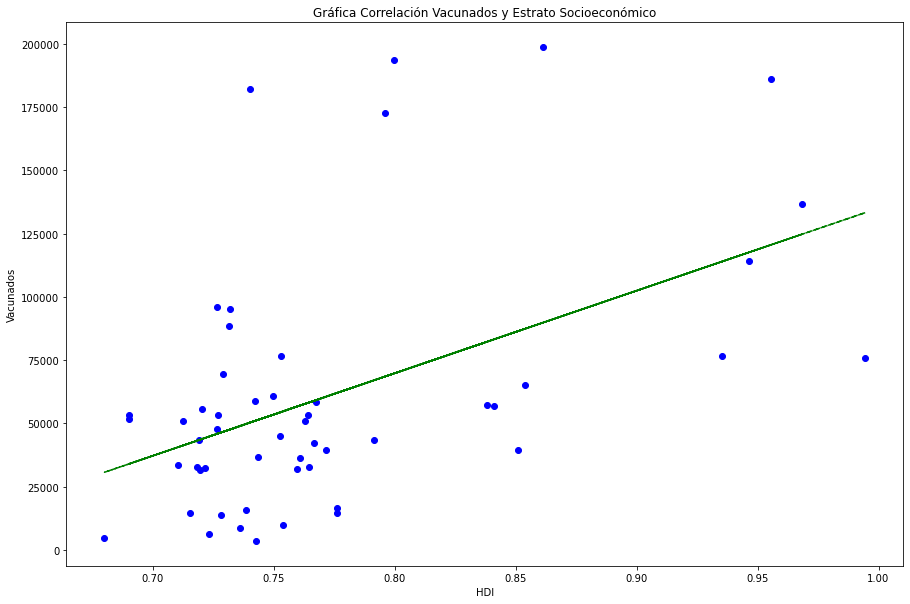

In [50]:
fig, ax = plt.subplots(figsize = (15,10))
x = vacuna['HDI']
y = vacuna['Vacunados']
ax.scatter(x , y , c='b')

plt.xlabel('HDI')
plt.ylabel('Vacunados')
plt.title('Gráfica Correlación Vacunados y Estrato Socioeconómico')

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),'g--')

plt.show()

In [23]:
rango = pd.read_csv ('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto77/total_vacunados_region_edad_std.csv')

In [24]:
rango = rango [rango['Region']== 'Metropolitana']
rango = rango[rango['Dosis']=='Segunda']

In [25]:
rango

,Region,Dosis,Edad,Cantidad
29,Metropolitana,Segunda,15,0.0
65,Metropolitana,Segunda,16,0.0
101,Metropolitana,Segunda,17,0.0
137,Metropolitana,Segunda,18,11422.0
173,Metropolitana,Segunda,19,14346.0
...,...,...,...,...
2225,Metropolitana,Segunda,76,32216.0
2261,Metropolitana,Segunda,77,29265.0
2297,Metropolitana,Segunda,78,27491.0
2333,Metropolitana,Segunda,79,25051.0


In [26]:
rango = rango[['Edad', 'Cantidad']].copy()

In [27]:
rango_0a5 = rango[rango['Edad']<5]

In [28]:
rango_6a14 = rango[rango['Edad']>6]
rango_6a14 = rango[rango['Edad']<14]

In [29]:
rango_15a64 = rango[rango['Edad']>15]
rango_15a64 = rango[rango['Edad']<64]

In [30]:
rango_65 = rango[rango['Edad']>65]

**CORRELACIÓN VACUNADOS CON EDAD**

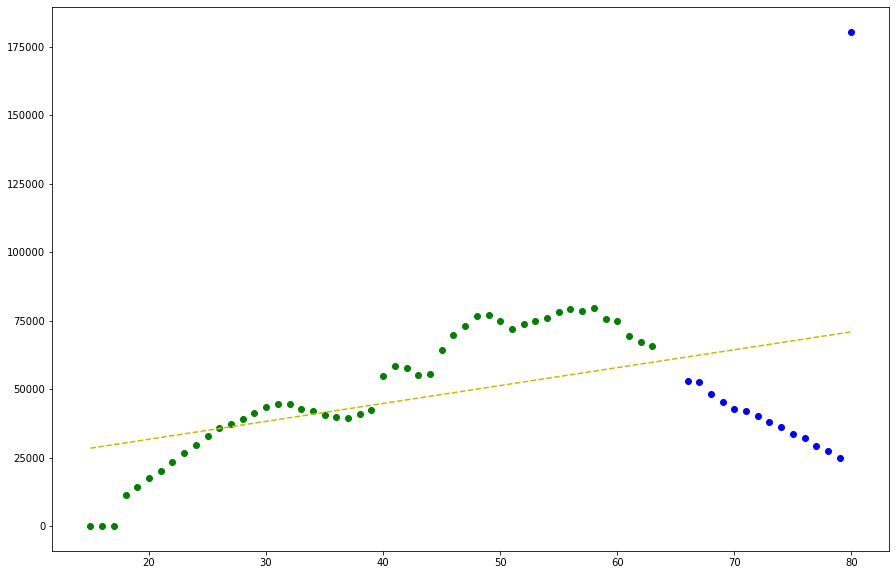

In [77]:
plt.figure(figsize = (15,10))

x1 = rango_0a5['Edad']
y1 = rango_0a5['Cantidad']
plt.scatter(x1, y1, c='r',  label = '0 a 5')

x2 = rango_6a14['Edad']
y2 = rango_6a14['Cantidad']
plt.scatter(x2, y2, c='y', label = '6 a 14')

x3 = rango_15a64['Edad']
y3 = rango_15a64['Cantidad']
plt.scatter(x3, y3, c='g', label = '15 a 64')

x4 = rango_65['Edad']
y4 = rango_65['Cantidad']
plt.scatter(x4, y4, c='b', label = '65 y más')

x_full = x1.append(x2).append(x3).append(x4)
y_full = y1.append(y2).append(y3).append(y4)

z = np.polyfit(x_full, y_full , 1)
p = np.poly1d(z)
plt.plot(x_full, p(x_full), 'y--')
plt.show()

No hay personas menores a 15 que se hayan vacunado.